In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [2]:
os.chdir("C://Users/Acer\\Million songs")
os.getcwd()

'C:\\Users\\Acer\\Million songs'

In [3]:
df=pd.read_csv('C:\\Users\\Acer\\Million songs\\Final Dataset.csv')
df.drop(['analysis_url', 'artist', 'id', 'track_href', 'track_name', 'type', 'uri', 'Unnamed: 0'], axis= 1, inplace=True)
df=df[pd.notnull(df['tempo'])]
df.head()


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,billboard
0,0.104,0.517,208588.0,0.5290,0.000017,4.0,0.0868,-5.803,1.0,0.0273,120.035,4.0,0.275,0
1,0.987,0.518,216373.0,0.0600,0.000008,10.0,0.1610,-14.887,1.0,0.0441,127.870,4.0,0.336,1
2,0.121,0.866,162000.0,0.7260,0.000000,2.0,0.1590,-9.069,1.0,0.0609,132.450,4.0,0.673,0
3,0.963,0.581,149827.0,0.0543,0.000274,0.0,0.0968,-14.595,1.0,0.0466,124.185,4.0,0.175,1
4,0.474,0.857,64520.0,0.4780,0.000000,0.0,0.0921,-13.777,1.0,0.0497,116.093,3.0,0.977,0


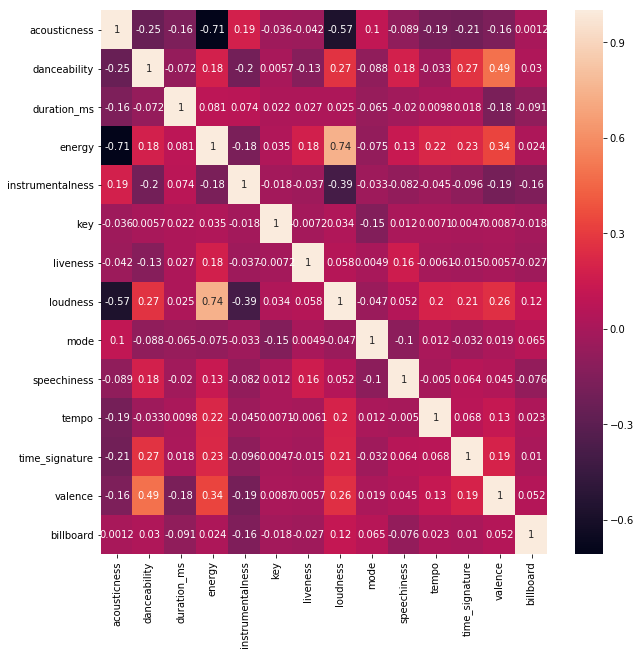

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


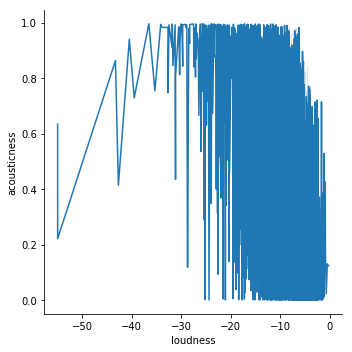

In [5]:
sns.relplot(x='loudness',y='acousticness', kind='line',data=df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4232 entries, 0 to 4263
Data columns (total 14 columns):
acousticness        4232 non-null float64
danceability        4232 non-null float64
duration_ms         4232 non-null float64
energy              4232 non-null float64
instrumentalness    4232 non-null float64
key                 4232 non-null float64
liveness            4232 non-null float64
loudness            4232 non-null float64
mode                4232 non-null float64
speechiness         4232 non-null float64
tempo               4232 non-null float64
time_signature      4232 non-null float64
valence             4232 non-null float64
billboard           4232 non-null int64
dtypes: float64(13), int64(1)
memory usage: 495.9 KB


In [8]:
data=df.values
X=data[:, 0:13]
Y=data[:,13]

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
min_max_scaler=preprocessing.MinMaxScaler()
X_scale=min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test=train_test_split(X_scale, Y, random_state=3)


In [15]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)
prediction=model.score(X_test, Y_test)
print(prediction)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scale, Y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

0.6417769376181475
[0.62884161 0.63120567 0.63679245 0.63829787 0.63829787 0.64066194
 0.64066194 0.64066194 0.643026   0.64858491]
0.6387032204826264
